In [1]:
using PyPlot

# Aufgabe 1

Man definiere $\phi_1 = \dot\phi $ und $ r_1 = \dot r $ und erhält folgendes Differentialgleichungssystem:
\begin{align}
  \dot \phi - \phi_1 = 0 \\
  \dot r - r_1 = 0 \\
  m \dot r_1 - mr\dot\phi_1^2 + \frac{\partial V}{\partial r} = 0 \\
  \frac{d}{dt}(mr^2\phi_1) = mr^2\dot\phi_1+2mr_1\phi_1 = 0
\end{align}

# Aufgabe 2

\begin{align}
  l(t) = 1+asin(t) \\
  	\Leftrightarrow \dot l(t) = acos(t)
\end{align}

In [2]:
function f(U1, U2, t, a) # Pendel mit variabler Fadenlaenge
    return (sin(U1) + 2*(a*cos(t))*U2) / (1+a*sin(t))
end
function euler(func, start, dt, steps, fargs = [])
    # func = zu Differenzierende Funktion; start = Anfangswertvektor (Aufsteigend in der Ordnung); dt = Zeitschritt
    ## steps = Anzahl der Iterationen; fargs = moegliche Argumente der Funktion
    order = length(start) # Ordnung der DGL
    t = [i*dt for i in 0:steps]
    result = Array(Float64, order, steps+1)
    result[:, 1] = start
    for i in 1:steps
        last_values = result[:, i] # Ergebnisse aus letzer Iterarion
        # f Vektor (siehe Skript)
        f = [[last_values[i] for i in 2:order]..., -func(last_values..., t[i], fargs...)]
        result[:,i+1] = last_values + dt * f
    end
    return (t,[result[i,:] for i in 1:order]...)
end

euler (generic function with 2 methods)

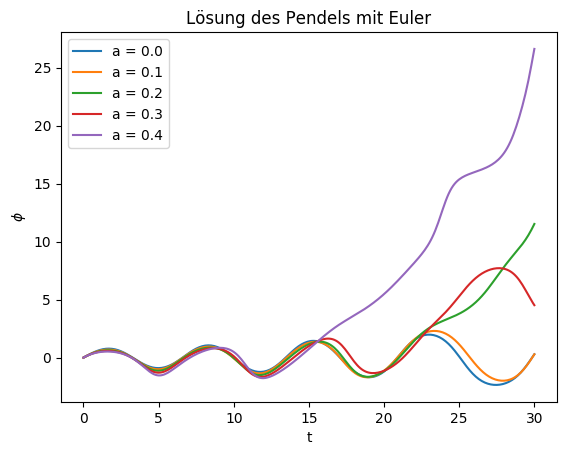

In [3]:
for a in [i/10 for i in 0:4]
    (t, phi, dphi) = euler(f, [0, 0.7], .1, 300, a)
    plot(t, phi, label = @sprintf("a = %.1f", round(a,1)))
end
legend(loc="best")
ylabel("\$\\phi\$")
xlabel("t")
title("Lösung des Pendels mit Euler")
show()

# Aufgabe 3

### Teilaufgabe a

In [4]:
function f_c(U1, U2, t, l) # Pendel mit konstanter Fadenlaenge
    return sin(U1) / l
end

function rungekutta(func, start, dt, steps, fargs = [])
    # func = zu Differenzierende Funktion; start = Anfangswertvektor (Aufsteigend in der Ordnung); dt = Zeitschritt
    ## steps = Anzahl der Iterationen; fargs = moegliche Argumente der Funktion
    order = length(start) # Ordnung der DGL
    t = [i*dt for i in 0:steps] 
    result = Array(Float64, order, steps+1)
    result[:, 1] = start
    for i in 1:steps
        last_values = result[:, i] # Ergebnisse aus letzer Iterarion
        # f Vektoren (siehe Skript)
        f = [[last_values[i] for i in 2:order]..., -func(last_values..., t[i], fargs...)]
        f_1 = [[last_values[i]+dt*f[i] for i in 2:order]..., -func(last_values+dt*f..., t[i]+dt, fargs...)]
        result[:,i+1] = last_values + 1//2*dt*f + 1//2*dt*f_1
    end
    return (t,[result[i,:] for i in 1:order]...)
end

rungekutta (generic function with 2 methods)

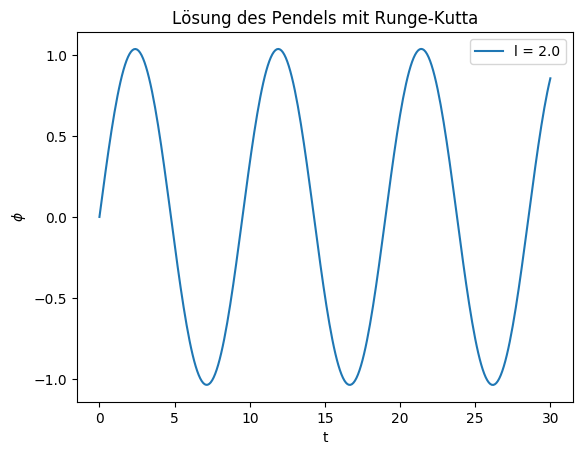

In [5]:
l = 2
(t, phi, dphi) = rungekutta(f_c, [0, 0.7], 0.1, 300, l)
plot(t, phi, label = @sprintf("l = %.1f", round(l,1)))
legend(loc="best")
ylabel("\$\\phi\$")
xlabel("t")
title("Lösung des Pendels mit Runge-Kutta")
show()

### Teilaufgabe b

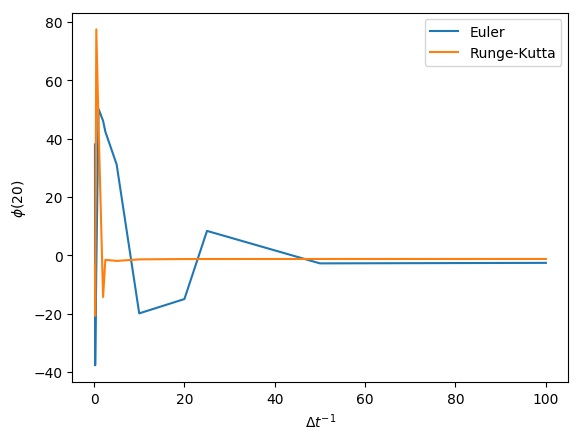

In [6]:
n = 2
l = 1

# erstelle eine Liste von (dt, step) die bis t = 2 iterieren
A = Array(Float64, (n+1)*4, 2)
i = 1
for power in 0:n
    for step in [5.,4.,2.,1.]
        dt = step*10.0^(-power)
        A[i, :] = [dt, 20/dt]
        i += 1
    end
end

# Löse die DGLs
x = Array(Float64,(n+1)*4)
y_euler = Array(Float64,(n+1)*4)
y_rungekutta = Array(Float64,(n+1)*4)
for i in 1:(n+1)*4
    (dt, steps) = A[i,:]
    steps = Int32(steps)
    x[i] = 1/dt
    (t, phi, dphi) = euler(f_c, [0.0,1.9], dt, steps, l)
    y_euler[i] = phi[length(phi)]
    
    (t, phi, dphi) = rungekutta(f_c, [0.0,1.9], dt, steps, l)
    y_rungekutta[i] = phi[length(phi)]
end

# Plotten
plot(x, y_euler, label = "Euler")
plot(x, y_rungekutta, label = "Runge-Kutta")
legend(loc="best")
ylabel("\$\\phi(20)\$")
xlabel("\$\\Delta t ^{-1}\$")
title("")
show()

Wie erwartet nähert sich das Runge-Kutta-Verfahren wesentlich schneller (also bei wesentlich größeren $\Delta t$) einem Wert an als das Eulerverfahren.